#Etude de la fréquentation des lignes Paris-Bordeaux

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
parisbordeaux = pd.read_csv('https://raw.githubusercontent.com/mdlbm/SNCF-Immobilier/Mats/parisbordeaux.csv')

In [146]:
#tri des données de circulation par période
parisbordeaux = parisbordeaux.sort_values(['Période'])
parisbordeaux['Nombre de circulations effectives'] = (parisbordeaux['Nombre de circulations prévues'])-(parisbordeaux['Nombre de trains annulés']) #Création de la varaible nombre de circulations effectives
parisbordeaux['Service'] = parisbordeaux['Service'].replace(np.nan,'LGV') #Remplacement des valeurs NaN par la valeur LGV
parisbordeaux

,Année,Mois,Service,Gare de départ,Gare d'arrivée,Durée moyenne du trajet (min),Nombre de circulations prévues,Nombre de trains annulés,Nombre de trains en retard au départ,Retard moyen des trains en retard au départ (min),Retard moyen de tous les trains au départ (min),Nombre de trains en retard à l'arrivée,Retard moyen des trains en retard à l'arrivée (min),Retard moyen de tous les trains à l'arrivée (min),Période,Nombre de circulations effectives
2,2015,1.0,National,PARIS MONTPARNASSE,BORDEAUX ST JEAN,208.685668,615.0,1.0,19.0,17.684211,0.693811,58.0,37.655172,4.705212,2015-01,614.0
3,2015,2.0,National,PARIS MONTPARNASSE,BORDEAUX ST JEAN,210.177083,577.0,1.0,22.0,19.772727,0.949653,44.0,30.772727,4.307292,2015-02,576.0
8,2015,3.0,National,PARIS MONTPARNASSE,BORDEAUX ST JEAN,207.714729,645.0,0.0,8.0,21.375000,0.337984,27.0,32.740741,2.040310,2015-03,645.0
20,2015,4.0,National,PARIS MONTPARNASSE,BORDEAUX ST JEAN,207.685127,632.0,0.0,15.0,13.066667,0.458861,42.0,35.761905,3.128165,2015-04,632.0
1,2015,5.0,National,PARIS MONTPARNASSE,BORDEAUX ST JEAN,211.077044,637.0,1.0,10.0,18.100000,0.413522,34.0,43.676471,2.451258,2015-05,636.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,2020,2.0,LGV,PARIS MONTPARNASSE,BORDEAUX ST JEAN,147.564789,716.0,6.0,562.0,2.628410,1.973075,56.0,21.617262,2.226667,2020-02,710.0
61,2020,3.0,LGV,PARIS MONTPARNASSE,BORDEAUX ST JEAN,146.943946,501.0,55.0,348.0,2.989368,2.204596,77.0,24.003247,5.401457,2020-03,446.0
59,2020,4.0,LGV,PARIS MONTPARNASSE,BORDEAUX ST JEAN,153.891892,92.0,55.0,35.0,7.185238,6.765766,20.0,22.676667,15.250000,2020-04,37.0
64,2020,5.0,LGV,PARIS MONTPARNASSE,BORDEAUX ST JEAN,145.522222,325.0,55.0,220.0,2.131212,1.648704,36.0,26.245833,4.363333,2020-05,270.0


Text(25, 100, 'Mise en service de la ligne LGV')

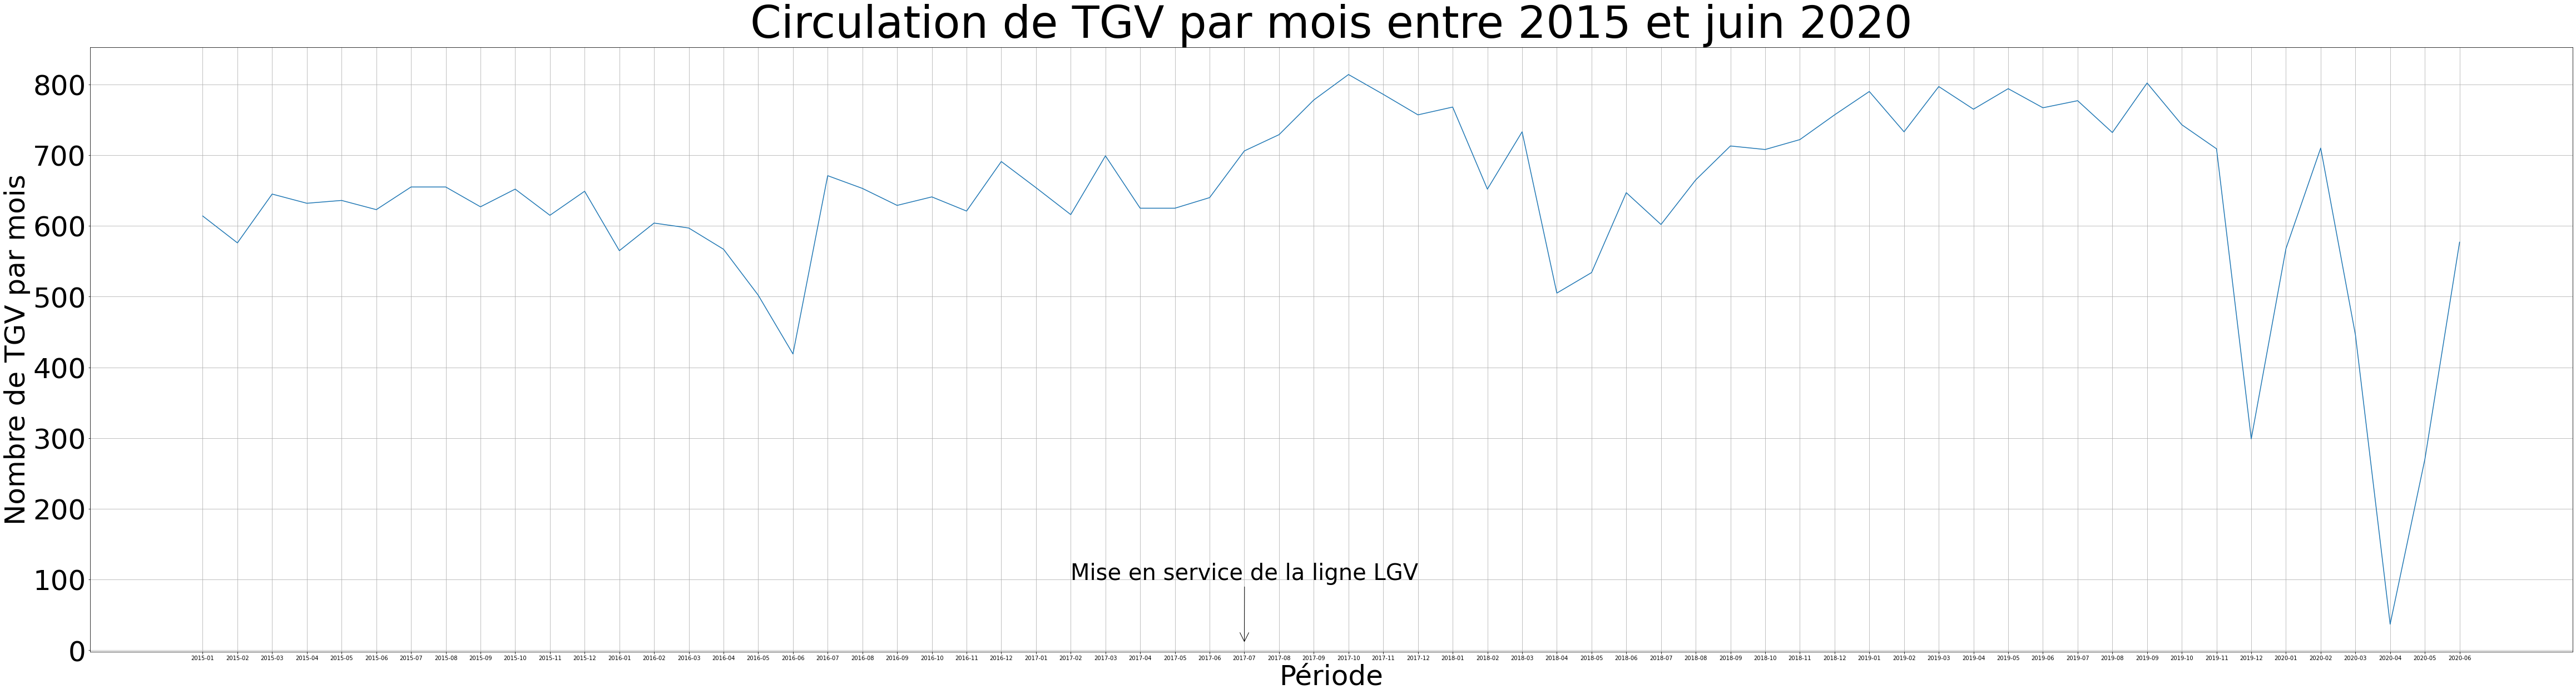

In [162]:
plt.figure(figsize=(80,20))
plt.plot(parisbordeaux['Période'],parisbordeaux['Nombre de circulations effectives'])
plt.title('Circulation de TGV par mois entre 2015 et juin 2020',size = 80)
plt.xlabel('Période', size = 50)
plt.ylabel('Nombre de TGV par mois', size = 50)
plt.grid() 

plt.yticks(size = 50)
plt.annotate('Mise en service de la ligne LGV', xy=(30, 10),
xytext=(25,100),
arrowprops=dict(facecolor='black',
arrowstyle='->'), size=40)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


<BarContainer object of 2 artists>

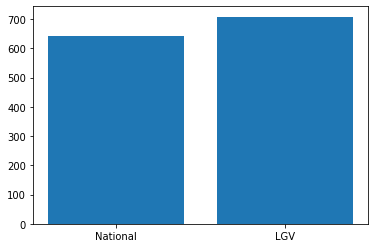

In [148]:
moyenne_circulation_service = [parisbordeaux[parisbordeaux['Service']=='National']['Nombre de circulations effectives'].mean(),parisbordeaux[parisbordeaux['Service']=='LGV'][parisbordeaux['Période']<'2019-09']['Nombre de circulations effectives'].mean()]
plt.bar(['National','LGV'],moyenne_circulation_service)

En prenant soin d'enlever les données que la crise sanitaire pouvait altérer, on voit donc que la ligne LGV a fait augmenter le nombre de trajet moyen par mois d'environ 65.

In [149]:
#J'ai essayé, sans succès, de faire une fonction pour ne pas avoir  à refaire ce protocole
bordeauxparis = pd.read_csv('https://raw.githubusercontent.com/mdlbm/SNCF-Immobilier/Mats/bordeauxparis.csv')
bordeauxparis = bordeauxparis.sort_values(['Période'])
bordeauxparis['Nombre de circulations effectives'] = (bordeauxparis['Nombre de circulations prévues'])-(bordeauxparis['Nombre de trains annulés']) #Création de la varaible nombre de circulations effectives
bordeauxparis['Service'] = bordeauxparis['Service'].replace(np.nan,'LGV') #Remplacement des valeurs NaN par la valeur LGV
bordeauxparis

,Année,Mois,Service,Gare de départ,Gare d'arrivée,Durée moyenne du trajet (min),Nombre de circulations prévues,Nombre de trains annulés,Nombre de trains en retard au départ,Retard moyen des trains en retard au départ (min),Retard moyen de tous les trains au départ (min),Nombre de trains en retard à l'arrivée,Retard moyen des trains en retard à l'arrivée (min),Retard moyen de tous les trains à l'arrivée (min),Période,Nombre de circulations effectives
45,2015,1.0,National,BORDEAUX ST JEAN,PARIS MONTPARNASSE,210.638462,653.0,3.0,62.0,25.016129,2.969231,63.0,60.396825,5.683077,2015-01,650.0
36,2015,2.0,National,BORDEAUX ST JEAN,PARIS MONTPARNASSE,211.197411,619.0,1.0,53.0,19.981132,2.370550,53.0,42.169811,3.745955,2015-02,618.0
41,2015,3.0,National,BORDEAUX ST JEAN,PARIS MONTPARNASSE,209.769795,682.0,0.0,70.0,13.914286,1.966276,44.0,40.113636,3.431085,2015-03,682.0
31,2015,4.0,National,BORDEAUX ST JEAN,PARIS MONTPARNASSE,209.726172,663.0,2.0,103.0,17.796117,3.537065,47.0,41.914894,3.670197,2015-04,661.0
44,2015,5.0,National,BORDEAUX ST JEAN,PARIS MONTPARNASSE,211.434389,663.0,0.0,121.0,14.140496,3.285068,39.0,38.358974,1.941176,2015-05,663.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,2020,2.0,LGV,BORDEAUX ST JEAN,PARIS MONTPARNASSE,145.998682,765.0,6.0,326.0,7.165440,2.792885,78.0,30.495513,2.751274,2020-02,759.0
59,2020,3.0,LGV,BORDEAUX ST JEAN,PARIS MONTPARNASSE,142.476596,519.0,49.0,192.0,6.777344,2.544468,81.0,28.860082,6.171206,2020-03,470.0
61,2020,4.0,LGV,BORDEAUX ST JEAN,PARIS MONTPARNASSE,152.107143,107.0,51.0,31.0,2.134409,0.960119,42.0,18.363889,17.791071,2020-04,56.0
64,2020,5.0,LGV,BORDEAUX ST JEAN,PARIS MONTPARNASSE,143.230159,301.0,49.0,111.0,4.492342,1.763492,28.0,33.616667,1.776257,2020-05,252.0


Text(25, 30, 'Bonjour')

<Figure size 432x288 with 0 Axes>

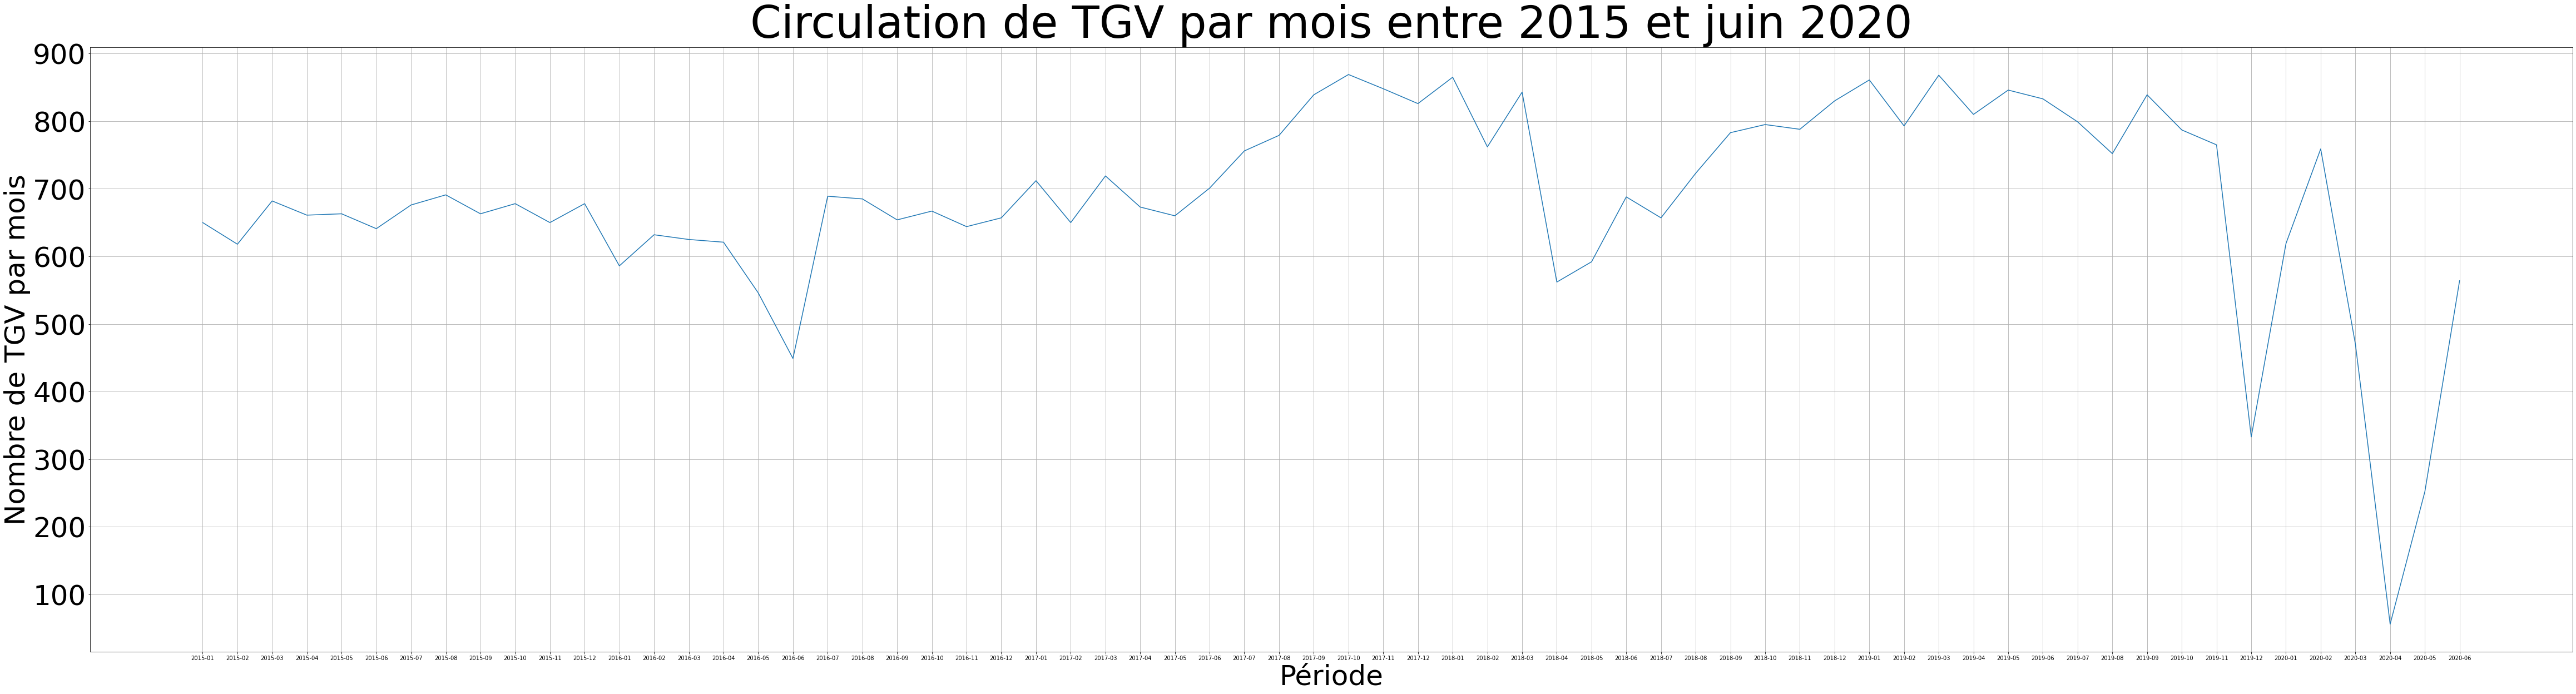

In [163]:
plt.clf() 
 
plt.figure(figsize=(80,20))
plt.plot(bordeauxparis['Période'],bordeauxparis['Nombre de circulations effectives'])
plt.title('Circulation de TGV par mois entre 2015 et juin 2020',size = 80)
plt.xlabel('Période', size = 50)
plt.ylabel('Nombre de TGV par mois', size = 50)
plt.grid() 

plt.yticks(size = 50)
plt.annotate('Mise en service de la ligne LGV', xy=(30, 10),xytext=(25,100),arrowprops=dict(facecolor='black',arrowstyle='->'), size=40)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


[678.8333333333334, 772.5]

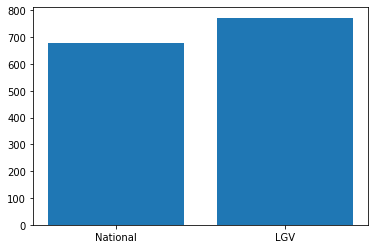

In [165]:
moyenne_circulation_service_bordeauxparis = [bordeauxparis[bordeauxparis['Service']=='National']['Nombre de circulations effectives'].mean(),bordeauxparis[bordeauxparis['Service']=='LGV'][bordeauxparis['Période']<'2019-09']['Nombre de circulations effectives'].mean()]
plt.bar(['National','LGV'],moyenne_circulation_service_bordeauxparis)
moyenne_circulation_service_bordeauxparis

En prenant soin d'enlever les données que la crise sanitaire pouvait altérer, on voit donc que la ligne LGV a fait augmenter le nombre de trajet moyen par mois d'environ 94.

In [175]:
frequentation_paris_bordeaux=pd.read_csv('https://raw.githubusercontent.com/mdlbm/SNCF-Immobilier/Mats/frequentation-paris-bordeaux.csv', sep=';')
frequentation_paris_bordeaux


,Nom de la gare,Total Voyageurs 2019,Total Voyageurs 2018,Total Voyageurs 2017,Total Voyageurs 2016,Total Voyageurs 2015
0,Bordeaux Saint-Jean,17675655,16080989,14979299,12198403,12062338
1,Paris Montparnasse,61374035,59174531,57752741,55162747,55167519


# Hausse du prix de l'immobilier et les LGV de la SNCF

In [151]:
# Importation des données sur les valeurs immobilières de la Gironde

import requests
import pandas as pd
data_json = pd.DataFrame(requests.get("http://api.cquest.org/dvf?code_commune=33063").json()["resultats"])[["code_commune"
            , "code_postal", "code_type_local", "type_local", "surface_relle_bati", "nombre_pieces_principales", "lon"
            , "lat", 'date_mutation','numero_voie','voie','type_voie',"valeur_fonciere"]]
data_json.columns

Index(['code_commune', 'code_postal', 'code_type_local', 'type_local',
       'surface_relle_bati', 'nombre_pieces_principales', 'lon', 'lat',
       'date_mutation', 'numero_voie', 'voie', 'type_voie', 'valeur_fonciere'],
      dtype='object')

In [152]:
# Données avec surface renseignée (apartements)
data_json = data_json[data_json["type_local"]=="Appartement"]
data_json = data_json[data_json["surface_relle_bati"].notna()][data_json["valeur_fonciere"].notna()]

# Création de la variable valeur au m2
data_json["valeur_m2"] = data_json["valeur_fonciere"] / data_json["surface_relle_bati"]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [153]:
# Dimensions et Données manquantes 
print("(Nb_lignes, Nb_colonnes) = ",data_json.shape,'\n')
print("Nombre de valeurs manquantes par variables :\n",data_json.isna().sum())

(Nb_lignes, Nb_colonnes) =  (30543, 14) 

Nombre de valeurs manquantes par variables :
 code_commune                   0
code_postal                    0
code_type_local                0
type_local                     0
surface_relle_bati             0
nombre_pieces_principales      0
lon                          303
lat                          303
date_mutation                  0
numero_voie                  950
voie                           0
type_voie                      0
valeur_fonciere                0
valeur_m2                      0
dtype: int64


In [154]:
# Aperçu des données
data_json.sort_values("date_mutation", ascending = False).head(20)

,code_commune,code_postal,code_type_local,type_local,surface_relle_bati,nombre_pieces_principales,lon,lat,date_mutation,numero_voie,voie,type_voie,valeur_fonciere,valeur_m2
34759,33063,33000,2,Appartement,35.0,1.0,-0.570929,44.838712,2019-06-29,33,DES BAHUTIERS,RUE,156740.0,4478.285714
25676,33063,33000,2,Appartement,19.0,1.0,-0.583208,44.831418,2019-06-29,54,DU TONDU,RUE,151015.0,7948.157895
16655,33063,33800,2,Appartement,77.0,3.0,-0.559414,44.829330,2019-06-28,33,DE TAUZIA,RUE,335000.0,4350.649351
59110,33063,33300,2,Appartement,53.0,3.0,-0.565799,44.861593,2019-06-28,51,DE LEYBARDIE,RUE,196000.0,3698.113208
18161,33063,33800,2,Appartement,50.0,2.0,-0.564732,44.832282,2019-06-28,19,NERIGEAN,RUE,780000.0,15600.000000
18163,33063,33800,2,Appartement,50.0,2.0,-0.564732,44.832282,2019-06-28,19,NERIGEAN,RUE,780000.0,15600.000000
11014,33063,33800,2,Appartement,48.0,2.0,-0.566958,44.815598,2019-06-28,20,D AUPERIE,RUE,130000.0,2708.333333
41004,33063,33000,2,Appartement,133.0,5.0,-0.594373,44.848223,2019-06-28,53,MARC NOUAUX,CRS,406220.0,3054.285714
24802,33063,33000,2,Appartement,37.0,2.0,-0.587322,44.825987,2019-06-28,202,DE PESSAC,RUE,150500.0,4067.567568
18162,33063,33800,2,Appartement,18.0,1.0,-0.564732,44.832282,2019-06-28,19,NERIGEAN,RUE,780000.0,43333.333333


In [155]:
# data_json["voie"].unique().shape

In [156]:
# Variable distance par rapport à la gare de Bordeaux
from numpy import sin, cos, sqrt, arctan2, radians
data_json["distance_gare"] = (sin((radians(data_json["lat"])-radians(44.821996712))/2)**2 + cos(radians(data_json["lat"]))*cos(radians(44.821996712))*sin((radians(data_json["lon"])-radians(-0.55333112))/2)**2)
data_json["distance_gare"] = 2 * arctan2(sqrt(data_json["distance_gare"]), sqrt(1 - data_json["distance_gare"])) * 6373
data_json[['distance_gare','numero_voie',"voie",'type_voie']].sort_values("distance_gare")

,distance_gare,numero_voie,voie,type_voie
7612,0.129896,10,EUGENE DELACROIX,ALL
7608,0.129896,10,EUGENE DELACROIX,ALL
7609,0.129896,10,EUGENE DELACROIX,ALL
7611,0.129896,10,EUGENE DELACROIX,ALL
7610,0.129896,10,EUGENE DELACROIX,ALL
...,...,...,...,...
75439,NaN,35,JUDE,RUE
75442,NaN,35,JUDE,RUE
75445,NaN,35,JUDE,RUE
77003,NaN,1,DU DOCTEUR BERT CAUD,RUE


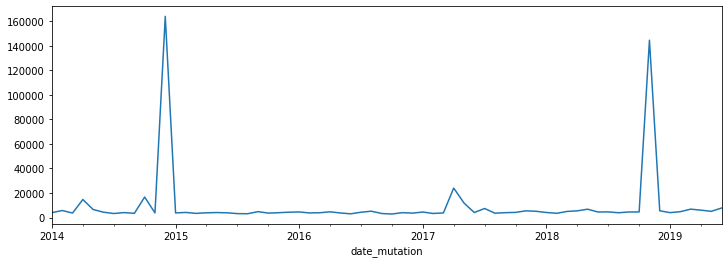

In [157]:
# Données sur un rayon de 2 km
k = 4
data_k = data_json[data_json["distance_gare"]>k][["date_mutation",'valeur_m2']].sort_values("date_mutation")

data_k["date_mutation"] = data_k["date_mutation"].astype('datetime64')

donnee_temporelle = data_k.groupby(data_k['date_mutation'].dt.to_period("M"))['valeur_m2'].mean()
donnee_temporelle.plot(figsize=(12,4))